Link to Post reads:

- TSNE original research paper: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
- Interactive Blog on how to effectively use TSNE: https://distill.pub/2016/misread-tsne/

In [19]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)
from matplotlib.pyplot import cm
import seaborn as sns

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits.data # flat output

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
X = digits.data
Y = digits.target  # we just use for visualisation not for algorithm

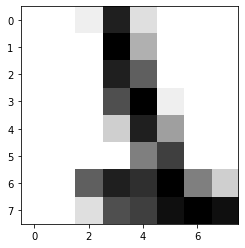

In [6]:
plt.gray()
plt.imshow(digits.images[1000], cmap=plt.cm.gray_r)

In [7]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

## PCA

In [8]:
# 64 dimesion ---> 2 dimension

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
z1 = pca.transform(X)

In [10]:
z1.shape

(1797, 2)

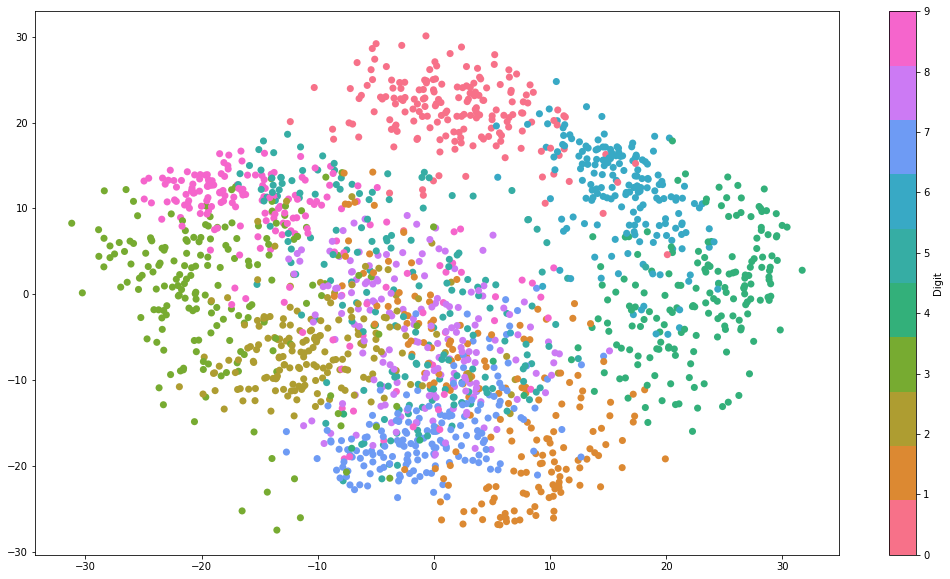

In [20]:
fig, ax = plt.subplots()
im = ax.scatter(z1[:,0], z1[:,1], s=50, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

In [12]:
pca.explained_variance_

array([179.0069301 , 163.71774688])

In [13]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [14]:
sum(pca.explained_variance_ratio_)

0.2850936482369105

## t-SNE

In [36]:
from sklearn.manifold import TSNE

t = time.time()
z2 = TSNE(n_components=3, random_state=0, perplexity=5, method='exact').fit_transform(X)
print(time.time() - t)

/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


84.45657110214233


In [29]:
z2.shape

(1797, 2)

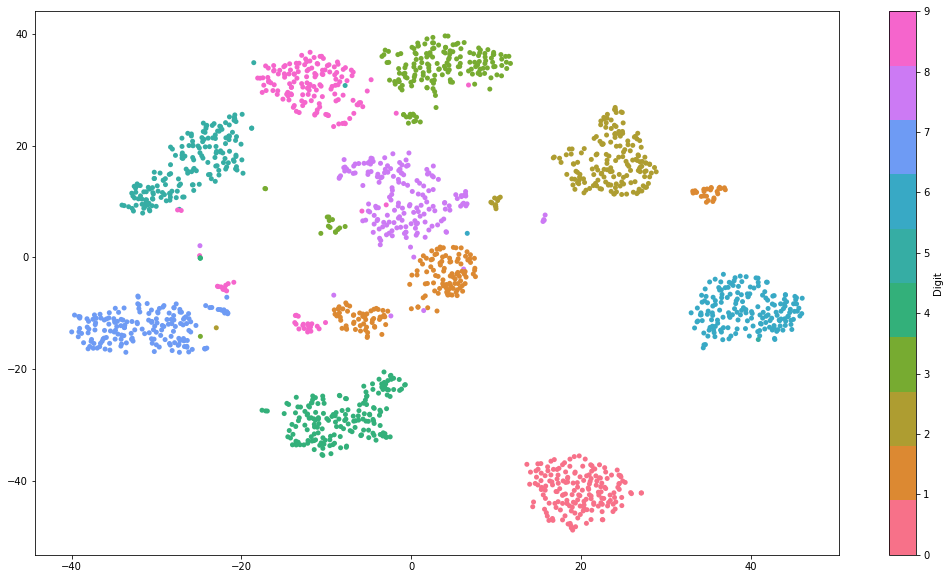

In [30]:
fig, ax = plt.subplots()
im = ax.scatter(z2[:,0], z2[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

- Visualisation of clusters

```pip install umap-learn```

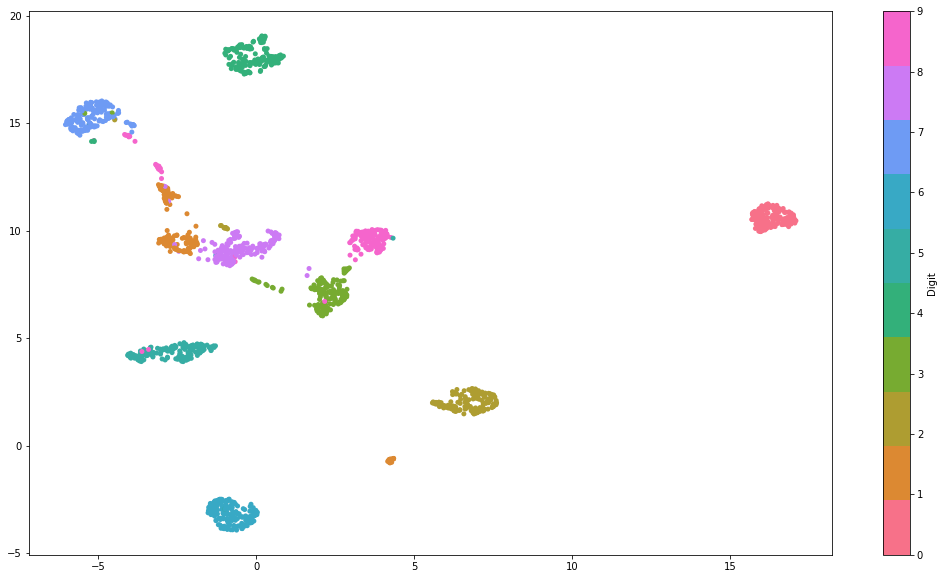

In [37]:
import umap
from umap import UMAP
# from sklearn.manifold import TNSE

z3 = umap.UMAP(n_components=2, n_neighbors=30).fit_transform(X)
# z2 = TSNE(n_components=2, random_state=0, perplexity=30.2).fit_transform(X)
fig, ax = plt.subplots()
im = ax.scatter(z3[:,0], z3[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

In [39]:
x = umap.UMAP(n_components=2, n_neighbors=30).fit(X)

In [ ]:
TSNE - Local structure preservation
UMAP - Global structure preservation